#Data Analysis with Python : Project Showcase (20th Oct 2020)

## <font color='#FFFFFF'>1. Defining the Research Problem</font>

### a) Background Information
<font color='#green' face='courier' size= 4>The Sports industry in Russia has seen an increase in profits for two leading sportswear
and athleisure brands brand (Nike and Adidas) for the past one year. This has led to the
emergence of premium sports startups such as Lublu, which would want to take
advantage of this opportunity and get a market share.<br> <p> 
As a Data Science Consultant working for Lublu, you have been tasked to perform
analysis on pricing, product and assortment of Adidas and Nike. You are then required to create a descriptive analysis report, making relevant observations and recommendations that will help Lublu in the launch of similar products.

</font> <br>

### b) Problem Statement
<font color='#green' face='courier' size= 4> Given the market intelligence data for Nike and Adidas brands, what would be the most appropriate ***Market Entry Strategy*** for Lublu?

</font> <br>

## <font color='#FFFFFF'>2. Data Importation, Exploration & Preparation</font>

### a) Data Importation

In [ ]:
# load the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read data from csv files into dataframes using pandas

# nike data
nike_df = pd.read_csv('nike_2020_04_13.csv')

# adidas data. You will notice the extra argument in this reading to specify the delimiter used in the csv
adidas_df = pd.read_csv('adidas_final.csv', ';')

### b) Data Exploration

We do not have available glossary for the datasets *(apart from the fact that prices are in Russian Roubles)* and therefore thorough exploration is necessary to understand their structure. 

In [ ]:
# get the column structure of the datasets.
# nike dataset

nike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   URL            643 non-null    object 
 1   Product Name   643 non-null    object 
 2   Product ID     643 non-null    object 
 3   Listing Price  643 non-null    int64  
 4   Sale Price     643 non-null    int64  
 5   Discount       643 non-null    int64  
 6   Brand          643 non-null    object 
 7   Description    640 non-null    object 
 8   Rating         643 non-null    float64
 9   Reviews        643 non-null    int64  
 10  Images         572 non-null    object 
 11  Last Visited   643 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 60.4+ KB


In [ ]:
nike_df.shape

(643, 12)

In [ ]:
adidas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2625 entries, 0 to 2624
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   URL            2625 non-null   object
 1   Product Name   2625 non-null   object
 2   Product ID     2625 non-null   object
 3   Listing Price  2625 non-null   int64 
 4   Sale Price     2625 non-null   int64 
 5   Discount       2625 non-null   int64 
 6   Brand          2625 non-null   object
 7   Description    2625 non-null   object
 8   Rating         2625 non-null   int64 
 9   Reviews        2625 non-null   int64 
 10  Images         2625 non-null   object
 11  Last Visited   2625 non-null   object
dtypes: int64(5), object(7)
memory usage: 246.2+ KB


In [ ]:
adidas_df.shape

(2625, 12)

*From the above checks, we notice that;*
1. *Nike dataset has `643` rows and `12` columns while Adidas dataset had `2,625` rows and `12` columns.*
2. *Both datasets have the same number of columns, field names as well as the datatypes, save for the 'Rating' column which is int64 for adidas dataset and float64 for nike dataset. Additionally, the column indices of the matching column names are in the same order.* 
3. *Apart from the `Images` column of the Nike dataset, we do not have any other null entries in the datasets. These records with null values for the images can be comfortably included in our analysis as the column data does not really affect our analysis.*<br>

*We will then proceed to sample records from each of the dataset for a better view of the data.*

In [ ]:
# sampling nike dataset records
nike_df.head (4)

,URL,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
0,https://www.nike.com/in/t/air-force-1-07-essen...,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:56
1,https://www.nike.com/in/t/air-force-1-07-shoe-...,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:56
2,https://www.nike.com/in/t/air-force-1-sage-low...,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:56
3,https://www.nike.com/in/t/air-max-dia-se-shoe-...,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_...",2020-04-13T15:27:57


In [ ]:
# sample a few records from adidas dataset
adidas_df.head(4)

,URL,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Images,Last Visited
0,https://shop.adidas.co.in/#!product/AH2430_nmd...,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,ORIGINALS,Channeling the streamlined look of an '80s rac...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:14
1,https://shop.adidas.co.in/#!product/G27341_adi...,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,ORIGINALS,"A modern take on adidas sport heritage, tailor...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
2,https://shop.adidas.co.in/#!product/CM0081_pukaws,Women's adidas Swim Puka Slippers,CM0081,999,599,40,CORE / NEO,These adidas Puka slippers for women's come wi...,0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15
3,https://shop.adidas.co.in/#!product/B44832_que...,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,CORE / NEO,"Inspired by modern tech runners, these women's...",0,0,"[""https://content.adidas.co.in/static/Product-...",2020-04-13T15:06:15


In [ ]:
# determine unique identifiers for datasets / brands. *to confirm this in class... ***
# nike_df.['Product ID'].value_counts()

### c) Data Preparation 

In [ ]:
# To avoid issues related with casing and spaces in column names, we replace the spaces with '_' in both datasets.
# and further convert all names to lowercase.

nike_df.columns = nike_df.columns.str.replace('\s+', '_').str.lower().str.strip()
adidas_df.columns = adidas_df.columns.str.replace('\s+', '_').str.lower().str.strip()

In [ ]:
# determine unique identifiers for datasets / brands for ease of referencing particular records.

#nike dataset
nike_df.product_id.value_counts()

CD6720-808    3
AO2607-401    2
AT5269-606    2
AO0578-717    2
133000-106    2
             ..
CD5050-400    1
AO9820-001    1
BV7775-100    1
366731-100    1
AQ7491-008    1
Name: product_id, Length: 554, dtype: int64

In [ ]:
# using the brands feature of the Nike dataset
nike_df.brand.value_counts()

Nike    643
Name: brand, dtype: int64

In [ ]:
# performing the same exercise on the adidas dataset
adidas_df.product_id.value_counts()

BD7791    1
EE5304    1
CG6112    1
EG6208    1
CK9787    1
         ..
EE9555    1
B75586    1
EE5614    1
EE4561    1
DB2680    1
Name: product_id, Length: 2625, dtype: int64

In [ ]:
# and now with the 'brands' column of adidas dataset
adidas_df.brand.value_counts()

CORE / NEO           1111
ORIGINALS             908
SPORT PERFORMANCE     606
Name: brand, dtype: int64

*From the above data checking we notice that*
1. *We have some cases where the 'Product ID' of Nike are duplicated. and so would be ggod to check if these are duplicate records*
2. *The Nike dataset has only one brand name for all the products, i.e `Nike`.*
3. *We do not have any duplicated product IDs for adidas.*
4. *We have 3 different brands of adidas, i.e `CORE / NEO`, `ORIGINALS`, and `SPORT PERFORMANCE`.*

In [ ]:
# checking for duplicates in the Nike dataset.

nike_df.duplicated().any()

False

*An interesting observation is that we have different entries for the same Product ID but not necessarily duplicated entries in the dataset. How is this so?.... Integrity of the data in the dataset may be? but upon using a different tool to filter such records, we notice that the only difference between the similar records is the timestamp in the `Last Visited` column where the difference is in terms of milliseconds / seconds. We therefore resolve to drop this colum for improved integrity of our data.*

In [ ]:
# drop the 'Last Visited' column for the datasets.

nike_df.drop(columns = ['last_visited'], inplace = True)
adidas_df.drop(columns = ['last_visited'], inplace = True)

In [ ]:
# Recheck the duplication of product IDs in the nike dataset

#nike_df.duplicated().any()
#nike_df.duplicated().sum()
sum(nike_df.duplicated())

88

In [ ]:
# perfect! we have a total of 88 duplicated records in the nike dataset which we proceed to drop.

nike_df = nike_df[~nike_df.duplicated()]

In [ ]:
nike_df.shape

(555, 11)

In [ ]:
# given that the two datasets have the same structure, we can merge them to have a global dataset for ease of 
# downstream analysis.

merge_df = nike_df.append(adidas_df)
merge_df.shape

(3180, 11)

*The new dataset with all the nike and adidas data has a total of 3,180 records. This is as per our expectation given that the constituent datasets had 555 rows and 2,625 rows respectively.* 
<br>

*At this point we can be assured of clean data that will support our investigations further which we will write to a new .csv file*

In [ ]:
# save the merged dataset to a clean CSV file, and download the same for permanence. 
from google.colab import files

merge_df.to_csv('merged_data.csv', index = False)
files.download('merged_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## <font color='#FFFFFF'>3. Data Analysis</font>

### 3.1 Univariate Analysis

In [ ]:
# get the summary statistics
nike_df.describe()

,listing_price,sale_price,discount,rating,reviews
count,555.000000,555.000000,555.0,555.000000,555.000000
mean,4115.738739,10250.154955,0.0,2.794955,7.493694
std,6081.506907,4263.802799,0.0,2.121859,16.714027
min,0.000000,1595.000000,0.0,0.000000,0.000000
25%,0.000000,7197.000000,0.0,0.000000,0.000000
50%,0.000000,9995.000000,0.0,3.900000,2.000000
75%,8995.000000,12896.000000,0.0,4.600000,7.000000
max,19995.000000,36500.000000,0.0,5.000000,223.000000


In [ ]:
adidas_df.describe()

,listing_price,sale_price,discount,rating,reviews
count,2625.000000,2625.000000,2625.000000,2625.0,2625.0
mean,7600.980952,5135.004190,33.459048,0.0,0.0
std,4071.014515,3589.990374,20.431622,0.0,0.0
min,899.000000,449.000000,0.000000,0.0,0.0
25%,4999.000000,2799.000000,0.000000,0.0,0.0
50%,6599.000000,3999.000000,40.000000,0.0,0.0
75%,8999.000000,6499.000000,50.000000,0.0,0.0
max,29999.000000,29999.000000,60.000000,0.0,0.0


In [ ]:
merge_df.describe()

,listing_price,sale_price,discount,rating,reviews
count,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000
mean,6992.707547,6027.742767,27.619497,0.487799,1.307862
std,4677.133304,4192.481308,22.492385,1.382168,7.535000
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4599.000000,2999.000000,0.000000,0.000000,0.000000
50%,5999.000000,4599.000000,40.000000,0.000000,0.000000
75%,8999.000000,7995.000000,50.000000,0.000000,0.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


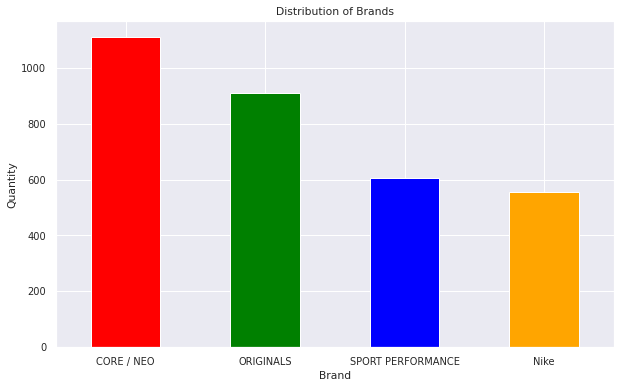

In [ ]:
# distribution of the different brads under review
sns.set(font_scale=0.9)

plt.figure(figsize = (10, 6))
merge_df.brand.value_counts().plot(kind = 'bar', rot = 0, color = ['red', 'green', 'blue', 'orange'])
plt.xlabel('Brand')
plt.ylabel('Quantity')
plt.title('Distribution of Brands')
plt.show()

In [ ]:
# tabular information of the brand distribution above.

print('Tabular Brand Distibution: \n')
merge_df.brand.value_counts()

# the same could also be achieved using 'merge_df.groupby('brand').count()', 
# however, this gives a repetative count of every numeric column, grouped by the specified property.

Tabular Brand Distibution: 



CORE / NEO           1111
ORIGINALS             908
SPORT PERFORMANCE     606
Nike                  555
Name: brand, dtype: int64

*From the above it is evident that Adidas brand, with its three streams of adidas sports wear has wider variety of products than the competitor Nike. As a matter of fact, the least of these streams is higher than Nike products!*

In [ ]:
# product rating information. This seeks to answer the question; Which is the highest rated product and which brand is it?

# nike records
nike_records = merge_df[merge_df.brand.isin(['Nike'])].sort_values(by='rating', ascending=0)
nike_records.head(90)

#this could also be achieved by sorting the records directly using the nike_df dataset.

,url,product_name,product_id,listing_price,sale_price,discount,brand,description,rating,reviews,images
285,https://www.nike.com/in/t/tiempo-legend-8-acad...,Nike Tiempo Legend 8 Academy IC,AT6099-606,0,6495,0,Nike,The Nike Tiempo Legend 8 Academy IC takes the ...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_..."
223,https://www.nike.com/in/t/air-zoom-terra-kiger...,Nike Air Zoom Terra Kiger 6,CJ0219-400,0,10995,0,Nike,The Nike Air Zoom Terra Kiger 6 is built to ta...,5.0,2,"[""https://static.nike.com/a/images/t_PDP_1728_..."
204,https://www.nike.com/in/t/zoom-rival-fly-runni...,Nike Zoom Rival Fly,CD7288-001,7995,6397,0,Nike,"Inspired by Japan's Ekiden relay runners, the ...",5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_..."
526,https://www.nike.com/in/t/air-jordan-1-jester-...,Air Jordan 1 Jester XX Low Laced,CI7815-602,0,7995,0,Nike,The Air Jordan 1 Jester XX Low knows not to ta...,5.0,2,NaN
525,https://www.nike.com/in/t/free-rn-5-aw-running...,Nike Free RN 5.0 AW,BV7775-100,8995,5397,0,Nike,"An ideal performer for runs up to 3 miles, the...",5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_..."
...,...,...,...,...,...,...,...,...,...,...,...
436,https://www.nike.com/in/t/air-force-1-07-shoe-...,Nike Air Force 1 '07 Premium,BQ4424-700,10995,7697,0,Nike,The Nike Air Force 1 '07 Premium captures the ...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_..."
69,https://www.nike.com/in/t/epic-phantom-react-a...,Nike Epic Phantom React A.I.R. Cody Hudson,CI1718-001,13995,8397,0,Nike,"Soft to the touch, the Nike Epic Phantom React...",5.0,2,"[""https://static.nike.com/a/images/t_PDP_1728_..."
31,https://www.nike.com/in/t/lebron-7-qs-shoe-pCX...,LeBron 7 QS,CU5646-001,0,16995,0,Nike,Make your head-turning journey to the top comf...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_..."
58,https://www.nike.com/in/t/air-max-97-shoe-cNRr...,Nike Air Max 97,CI3708-700,0,14995,0,Nike,The Air Max 97 shook up the running world with...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_..."


In [ ]:
# over 100 products have been rated 5.0 and therefore we will proceed to determine the distribution of the rating among various Nike products.

nike_records.rating.value_counts()

0.0    190
5.0    106
4.5     30
4.0     27
4.2     18
4.4     18
4.3     17
4.8     15
4.6     13
3.7     13
3.0     13
4.1     13
4.7     11
3.9      9
3.8      7
3.5      7
3.6      7
2.7      5
4.9      5
1.0      5
2.0      4
3.4      4
3.1      3
2.9      3
2.8      2
2.6      2
3.3      2
3.2      2
1.5      1
2.5      1
2.4      1
2.2      1
Name: rating, dtype: int64

In [ ]:
# a similar operation for Adidas shoes to determine popularity of the brand.

adidas_records = merge_df[~merge_df.brand.isin(['Nike'])].sort_values(by='rating', ascending=0)
adidas_records.head(90)

,url,product_name,product_id,listing_price,sale_price,discount,brand,description,rating,reviews,images
0,https://shop.adidas.co.in/#!product/AH2430_nmd...,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,ORIGINALS,Channeling the streamlined look of an '80s rac...,0.0,0,"[""https://content.adidas.co.in/static/Product-..."
1744,https://shop.adidas.co.in/#!product/EE7382_hoo...,Men's adidas Sports Inspired Hoops 2.0 Mid Shoes,EE7382,6599,3959,40,CORE / NEO,Mid-top style in a streamlined package. These ...,0.0,0,"[""https://content.adidas.co.in/static/Product-..."
1746,https://shop.adidas.co.in/#!product/EE7422_hoo...,Men's adidas Sports Inspired Hoops 2.0 Shoes,EE7422,4999,2999,40,CORE / NEO,Classic high top style in a low-profile look. ...,0.0,0,"[""https://content.adidas.co.in/static/Product-..."
1747,https://shop.adidas.co.in/#!product/EE7900_gra...,Men's adidas Sport Inspired Grand Court Base S...,EE7900,4599,4599,0,CORE / NEO,A mash-up of celebrated court styles. These '7...,0.0,0,"[""https://content.adidas.co.in/static/Product-..."
1748,https://shop.adidas.co.in/#!product/EE6151_3st004,Men's adidas Originals 3ST.004 Shoes,EE6151,10999,6599,40,ORIGINALS,"Created using feedback from adidas pro riders,...",0.0,0,"[""https://content.adidas.co.in/static/Product-..."
...,...,...,...,...,...,...,...,...,...,...,...
1663,https://shop.adidas.co.in/#!product/CK9657_kalusm,Men's adidas Running Kalus Shoes,CK9657,4299,2149,50,CORE / NEO,A well cushioned shoe with a fresher look that...,0.0,0,"[""https://content.adidas.co.in/static/Product-..."
1664,https://shop.adidas.co.in/#!product/AC7043_pwh...,men's ADIDAS ORIGINALS PW HU HOLI STAN SMITH S...,AC7043,9999,4999,50,ORIGINALS,A style icon gets some love from one of today'...,0.0,0,"[""https://content.adidas.co.in/static/Product-..."
1665,https://shop.adidas.co.in/#!product/FW9783_zx8000,Men's adidas Originals ZX 8000 Shoes,FW9783,12999,12999,0,ORIGINALS,Low light? No problem. These adidas trainers h...,0.0,0,"[""https://content.adidas.co.in/static/Product-..."
1666,https://shop.adidas.co.in/#!product/F35607_pre...,Men's adidas Football Predator 19.1 Firm Groun...,F35607,14999,8999,40,SPORT PERFORMANCE,If your command of the pitch leaves your rival...,0.0,0,"[""https://content.adidas.co.in/static/Product-..."


1. About 50% of Nike brand products were rated over 4.6, with half of these having been rated 5.0. 
2. No ratings for Adidas products were given and therefore incomplete data for this brand. (this is an assumption because all products were rated 0)

In [ ]:
# Adidas give's more descriptive product deescription part of which can be used to identify the product with gender. 
# we will try and investigate which products are popular in Russia, whether masculine or feminine products so as to advise Lublu accordingly.

#Feminine Adidas brand products
adidas_f_df = merge_df[~merge_df.brand.isin(['Nike'])]
adidas_f_df = adidas_f_df[adidas_f_df['product_name'].str.contains('Women')]


print('Count of Feminine Products: \n ')
adidas_f_df['product_name'].str.contains('Women').value_counts()


Count of Feminine Products: 
 


True    643
Name: product_name, dtype: int64

In [ ]:
# we could proceed to give details of each and every type of such products product using 

adidas_f_df.product_name.value_counts()

Women's adidas Originals Sambarose Shoes         16
Women's adidas Originals Sleek Shoes             13
Women's adidas Originals NMD_R1 Shoes            12
Women's adidas Originals Continental 80 Shoes    11
Women's adidas Originals Falcon Shoes            11
                                                 ..
Women's Sport Inspired Yking 2.0 Shoes            1
Women's Sport Inspired Archivo Shoes              1
Women's adidas Running Bolter Shoes               1
Women's adidas Running Astrarun Shoes             1
Women's adidas Khoe Run Shoes                     1
Name: product_name, Length: 272, dtype: int64

In [ ]:
# Adidas brand masculine products

adidas_m_df = merge_df[~merge_df.brand.isin(['Nike'])]
adidas_m_df = adidas_m_df[adidas_m_df['product_name'].str.contains('Men')]


print('Count of Masculine Products: \n ')
adidas_m_df['product_name'].str.contains('Men').value_counts()

Count of Masculine Products: 
 


True    1434
Name: product_name, dtype: int64

In [ ]:
# Adidas brand unisex products

adidas_u_df = merge_df[~merge_df.brand.isin(['Nike'])]
adidas_u_df = adidas_u_df[adidas_u_df['product_name'].str.contains('Unisex')]


print('Count of Unisex Products: \n ')
adidas_u_df['product_name'].str.contains('Unisex').value_counts()

Count of Unisex Products: 
 


True    93
Name: product_name, dtype: int64

*From the above analysis, we see men's products from adidas being more popular at 70% stocking than women's products.* 
*Unisex products account for only about 4% of the items* 

In [ ]:
# How do the prices of the brands compare?

sort_df = merge_df.sort_values(by='sale_price', ascending=0)
sort_df.head(50)

,url,product_name,product_id,listing_price,sale_price,discount,brand,description,rating,reviews,images
523,https://www.nike.com/in/t/air-vapormax-flyknit...,Nike Air VaporMax Flyknit 2 LXX,AT5673-700,0,36500,0,Nike,The Nike Air VaporMax Flyknit 2 LXX places you...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
2579,https://shop.adidas.co.in/#!product/BD7865_zx4...,Men's adidas Originals ZX 4000 4D Shoes,BD7865,29999,29999,0,ORIGINALS,"In the '80s, the science of sport and wearable...",0.0,0,"[""https://content.adidas.co.in/static/Product-..."
2554,https://shop.adidas.co.in/#!product/BD7927_zx4...,Men's adidas Originals ZX 4000 4D Shoes,BD7927,29999,29999,0,ORIGINALS,"In the '80s, the science of sport and wearable...",0.0,0,"[""https://content.adidas.co.in/static/Product-..."
1642,https://shop.adidas.co.in/#!product/FV6106_alp...,Unisex adidas Running Alphaedge 4D Shoes,FV6106,27999,27999,0,SPORT PERFORMANCE,Add an edge to your game with the new AlphaEdg...,0.0,0,"[""https://content.adidas.co.in/static/Product-..."
1553,https://shop.adidas.co.in/#!product/EF9624_zx4...,Men's adidas Originals ZX 4000 4D Shoes,EF9624,27999,27999,0,ORIGINALS,The ZX trainers series resets the running scen...,0.0,0,"[""https://content.adidas.co.in/static/Product-..."
1563,https://shop.adidas.co.in/#!product/EF9623_zx4...,Men's adidas Originals ZX 4000 4D Shoes,EF9623,27999,27999,0,ORIGINALS,The ZX trainers series resets the running scen...,0.0,0,"[""https://content.adidas.co.in/static/Product-..."
1438,https://shop.adidas.co.in/#!product/EF9625_zx4...,Men's adidas Originals ZX 4000 4D Shoes,EF9625,27999,27999,0,ORIGINALS,Thousands of athletes. Years of data. adidas 4...,0.0,0,"[""https://content.adidas.co.in/static/Product-..."
68,https://www.nike.com/in/t/mercurial-superfly-7...,Nike Mercurial Superfly 7 Elite SE FG,CT1099-093,0,24995,0,Nike,Everyone starts somewhere and Kylian Mbappé st...,0.0,0,NaN
306,https://www.nike.com/in/t/mercurial-superfly-7...,Nike Mercurial Superfly 7 Elite MDS FG,BQ5469-703,0,24995,0,Nike,Dream of speed and play fast in the Nike Mercu...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_..."
1614,https://shop.adidas.co.in/#!product/EG4901_awp...,Unisex adidas Originals by Alexander Wang Puff...,EG4901,23999,23999,0,ORIGINALS,Known for his playful aesthetic and party-read...,0.0,0,"[""https://content.adidas.co.in/static/Product-..."


*The lowest price from the data obtained is from the adidas collection and the highest cost is for a Nike. However, Adidas brand dominates the top 50 most expensive sportswear. The fact that Adidas have been sponsors of Soviet national olympic team in 1980 and in the later years could be a possible pointer.*

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


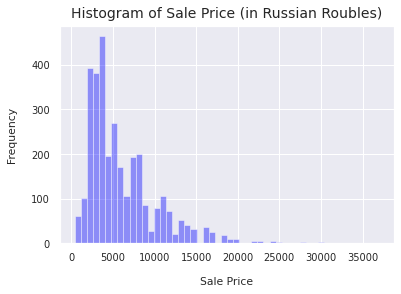

In [ ]:
# We need to interrogate the price distribution for all brands with the help of a histogram

sns.distplot(merge_df['sale_price'], kde = False, color='blue', hist_kws={"range": [400, 37000]})
plt.xlabel("Sale Price", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Histogram of Sale Price (in Russian Roubles)", fontsize=14, y=1.01) 
plt.show()

# annotations on the histogram
# kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable using Gaussian kernels.
# color - color to use for the bars
# hist_kws range to specify the range of values to plot in the histogram

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


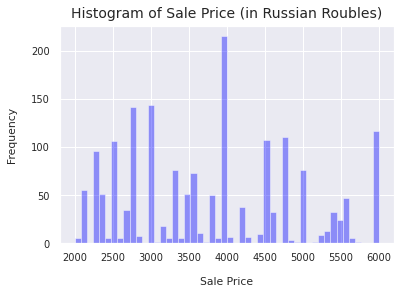

In [ ]:
# due to the varied pricing of these products we zoom in arund the mode price

sns.distplot(merge_df['sale_price'], kde = False, color='blue', hist_kws={"range": [2000, 6000]})
plt.xlabel("Sale Price", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Histogram of Sale Price (in Russian Roubles)", fontsize=14, y=1.01) 
plt.show()

### 3.2 Bivariate Analysis

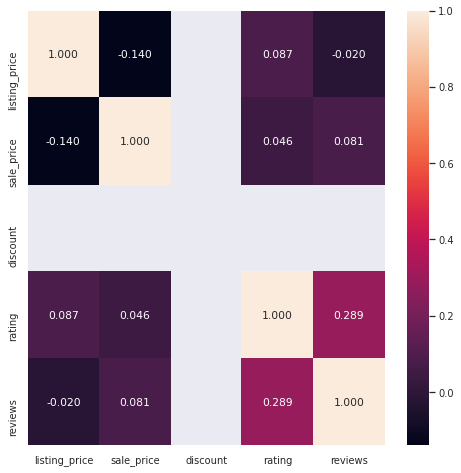

In [ ]:
# let us investigate if there is any positive and significat corelation between the variables in each of the datasets.

# Nike dataset
plt.figure(figsize=(8,8))
sns.heatmap(nike_df.corr(), annot=True, fmt=".3f")
plt.show()

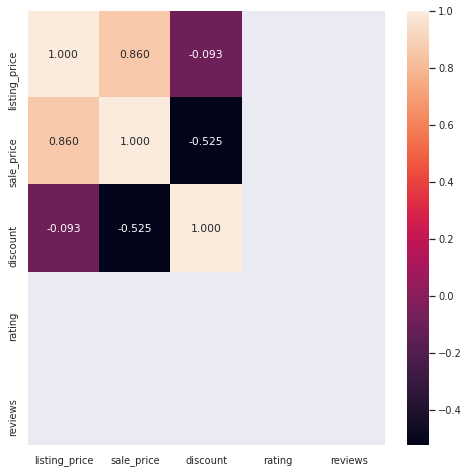

In [ ]:
# adidas dataset

plt.figure(figsize=(8,8))
sns.heatmap(adidas_df.corr(), annot=True, fmt=".3f")
plt.show()

## <font color='#FFFFFF'>4. Summary of Findings</font>

1. *Adidas, with its three streams of adidas sports wear has wider variety of products than the competitor Nike. As a matter of fact, the least of these streams is higher than Nike products!*
2. *The lowest price from the data obtained is from the adidas collection and the highest cost is for a Nike. However, Adidas brand dominates the top 50 most expensive sportswear. The fact that Adidas have been sponsors of Soviet national olympic team in 1980 and in the later years could be a possible pointer.*
3.  *Nike does not offer any discounts on its products while Adidas offers generous packages of upto 60% of the sale price on selected sportswear.*
4. *Adidas products, though most popular in the market are not rated unlike Nike brand where over 75% of the products are rated 5.0*
5. *There are 40% more products of Adidas men's products than there are for women.* 

## <font color='#FFFFFF'>5. Challenging your Solution</font>

1. *A study of market entry strategy can not be complete without having a view of customers response to the current market. It would help a great deal if we had a dataset with actual sales so that we are able to determine the popularity of each of the products in the study.*
2. *Our study noted that Adidas shoes were not rated. Rating helps in estimating the popularity of a product in the market, and can be used to improve the quality of products.*

<font size=2>*Acknowledgement* <br>
*The provided datasets were sourced from [Data World Adidas ](https://data.world/data-hut/product-data-from-adidas) and [Data World Nike](https://data.world/login?next=%2Fdata-hut%2Fproduct-data-from-nike%2Fworkspace%2Ffile%3Ffilename%3Dnike_2020_04_13.csv).* </font>